# EXERCÍCIO 3

Acesse o site de notícias da UFRN, percorrendo automaticamente todas as páginas com o filtro EAJ e a) construa a nuvem de palavras com base nas notícias pesquisadas. Ao pesquisar a palavra EAJ em https://ufrn.br/imprensa/noticias/filtros?text=eaj, temos atualmente (13.02.2021) 133 resultados, com vários assuntos relacionados à EAJ. Desejamos ver que termos se destacam nestes anos de publicações (identifique o intervalo da mais antiga para a mais nova no próprio resultado da busca) e uma nuvem de palavras é interessante; b) para cada notícia, guarde o ano de publicação, para uma simples verificação (por gráfico de barras com o matplotlib) da quantidade de notícias por ano.

In [58]:
import time
import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver

# Fazer a raspagem dos dados
driver = webdriver.Firefox()
driver.get('https://ufrn.br/imprensa/noticias/filtros?text=eaj')

def numero_paginas(numero_noticias):
    return round((int(numero_noticias)/10)+1)

title = ''

# tempo para página carregar
time.sleep(15)

try:
    noticias = []
    datas = []
    
    #Pegando noticias
    for pagina in range(13):
        body = driver.find_element_by_tag_name('body')
        html = body.get_attribute('innerHTML')
        soupPage = soup(html, 'html5lib')
        noticiasList = soupPage.findAll( "a", class_='blue-link')

        datasList = soupPage.findAll("div", class_='block-title')
        
        for i in range(len(datasList)):
            datas.append(datasList[i].findChild().get_text())
    
        for i in range(2,len(noticiasList)):
            title = 'https://ufrn.br/' + noticiasList[i].get('href') + "\n"
            noticias.append(title)
           
        driver.find_element_by_xpath("//a[contains(text(),'>')]").click()        
        time.sleep(2)

except Exception as e:
    print(e)

print('Raspagem de dados finalizada')
driver.close()

Raspagem de dados finalizada


In [51]:
# Fazer a raspagem dos dados
driver = webdriver.Firefox()
texto = ""

try:
    #Pegando texto da noticias
    for n in range(len(noticias)):
        driver.get(noticias[n])
        body = driver.find_element_by_tag_name('body')
        html = body.get_attribute('innerHTML')
        soupPage = soup(html, 'html5lib')
        paragrafos = soupPage.findAll("span", style="font-weight: 400;")
        
        for i in range(len(paragrafos)):
            texto += " "+paragrafos[i].text
        time.sleep(2)

except Exception as e:
    print(e)

print('Raspagem de dados finalizada')
driver.close()

Raspagem de dados finalizada


In [102]:
import numpy as np

datas_noticias = []
d = []

# #Tratar datas
for i in range(len(datas)): 
    d = datas[i].split(" ")
    datas_noticias.append(d[4])

anos, cont = np.unique(datas_noticias, return_counts=True)

['2016' '2017' '2018' '2019' '2020' '2021']
[ 7 27 20 29 31  8]


## Visualização da quantidade de notícias por ano

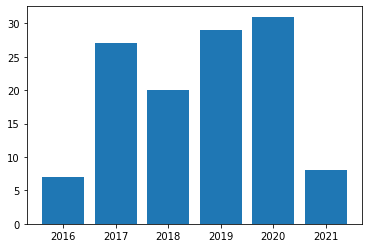

In [107]:
import matplotlib.pyplot as plt
plt.bar(anos, cont)
plt.show()

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from string import punctuation


STOPWORDS=set(stopwords.words('portuguese') + list(punctuation))

def create_word_cloud(string):
   maskArray = np.array(Image.open("../assets/cloud.jpg"))
   cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 200, mask = maskArray, stopwords = STOPWORDS)
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')

## Visualização dos termos que se destacam nestes anos de publicações

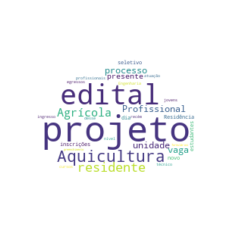

In [106]:
create_word_cloud(texto)